In [1]:
import pandas as pd
from plotnine import *

# importing statsmodels (for linear regression in python)
import statsmodels.formula.api as smf

/Users/misha/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


🚩I was getting a little confused with your markdown vs. my code so if you see red it's probably me rambling about something 🚩

## 🔴 To what extent do factors like neighborhood, minimum nights stayed and room type affect Airbnb prices in New York City?

I used a dataset of all Airbnb listings in New York City, let's see how the data looks below. The Data Source: http://insideairbnb.com/get-the-data.html *This data is sourced from publicly available information from the Airbnb site. I did not perform the scrape myself.

# Exploratory data analysis

This is your "clean notebook" for exploratory data viz. If you're just getting started, go to the `regressions-eda-scratchpad.ipynb` notebook and come back here once you've done some exploration and are getting ready to submit. 

This notebook doesn't have to tell a story from top-to-bottom, but the teaching team should be able to follow your logic as you explore. If you've come to a conclusion about something, put it in the title of the chart. If you have a takewaway or question, or are looking for feedback, put that in a markdown cell in text. This is your way to show the teaching team your exploratory data viz, and for us to give you feedback on it. 


## Load Data

Code for loading raw data like `pd.read_csv()` etc. -- will go into this section. 

In [2]:
df = pd.read_csv('listings1.csv', low_memory=False)
df.tail(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
38182,54150715,Private PATIO in PRIVATE Room | 5mins to Manha...,340322917,Elizabeth,Brooklyn,Bedford-Stuyvesant,40.692611,-73.933902,Private room,61,13,0,NaN,NaN,1,365,0,NaN
38183,54152478,Center of Columbia University in UWS New York,438705539,Qingnan,Manhattan,Morningside Heights,40.804473,-73.963734,Private room,60,1,0,NaN,NaN,1,159,0,NaN
38184,54161645,Escape to Haven in Manhattan-West 57th Street-...,355450429,Mike,Manhattan,Midtown,40.764400,-73.977960,Entire home/apt,110,1,0,NaN,NaN,4,5,0,NaN


### 🔴 For our analysis, 'price' is the dependent variable, while 'neighbourhood', 'room_type' and 'minimum_nights' are independent variables.  

### Our goal is to determine how much variance in price can be explained by our predictor variables. 

### Clean data

As you do your exploration, you may find that you need to transform the data (for example you want to extract the brand of a car from the name column, or rename 0 and 1 in the `am` column to "automatic" and "manual". I'd reccomend putting any of that code here and re-running the notebook. That way, when you come back to the notebook later, the data processing code is all at the top and you can chart or analyze whatever you want after it. 

Feel free to add as many cells as you need in this section.

### 🔴let's start by dropping columns we won't be using. 

In [3]:
df.drop(['id','name','host_id', 'host_name', 'last_review', 'reviews_per_month'], axis=1, inplace=True)

## Explore the data

### Summary Stats

This is the part of the data exploration where you get to understand what the columns are. You're welcome to pop open the data in excel as well to get a sense of it. At the very least, you'll want to run `.describe()` on your dataframe or dataframes. If you want to do a correlation matrix, you can use `.corr()` (sometimes I like to add `.round(2)` to the end of that so it doesn't report it out to too many decimal places)

In [4]:
df.describe().round(1)

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,38185.0,38185.0,38185.0,38185.0,38185.0,38185.0,38185.0,38185.0
mean,40.7,-73.9,159.3,21.2,23.8,17.8,139.8,5.6
std,0.1,0.1,292.5,29.0,51.1,58.0,145.4,15.2
min,40.5,-74.2,0.0,1.0,0.0,1.0,0.0,0.0
25%,40.7,-74.0,68.0,3.0,1.0,1.0,0.0,0.0
50%,40.7,-74.0,109.0,30.0,4.0,1.0,87.0,0.0
75%,40.8,-73.9,175.0,30.0,21.0,4.0,304.0,4.0
max,40.9,-73.7,10000.0,1250.0,1010.0,399.0,365.0,713.0


In [8]:
df.price.describe().round(1)

count    38185.0
mean       159.3
std        292.5
min          0.0
25%         68.0
50%        109.0
75%        175.0
max      10000.0
Name: price, dtype: float64

In [9]:
df[['room_type','price']].groupby('room_type')\
.agg(['mean','count'])\
.sort_values(by=('price','mean'), ascending=False).round(2)

price       
                   mean  count
room_type                     
Hotel room       237.07    209
Entire home/apt  210.97  20376
Shared room      150.48    566
Private room      96.80  17034

🔴 Entire home listings are the most popular and can earn you more than shared or private room listings.

In [10]:
df[['neighbourhood_group','price']].groupby('neighbourhood_group')\
.agg(['mean','count'])\
.sort_values(by=('price','mean'), ascending=False).round(2)

price       
                       mean  count
neighbourhood_group               
Manhattan            201.88  16606
Brooklyn             132.56  14682
Staten Island        116.62    340
Queens               115.96   5431
Bronx                101.56   1126

🔴 Unsurpisingly, Manhattan has more number of listings and higher priced listings...

In [11]:
df[['minimum_nights','price']].groupby('minimum_nights')\
.agg(['mean','count'])\
.sort_values(by=('price','mean'), ascending=True).round(2)

price      
                    mean count
minimum_nights                
999                31.00     1
22                 35.00     1
356                39.00     1
53                 40.00     1
114                40.00     1
...                  ...   ...
38               1000.00     1
40               1031.92    12
304              1275.00     1
99               2521.33     3
72              10000.00     1

[119 rows x 2 columns]

🔴 Idk what to make of this yet, but we'll come back to it!

### Plots (exploratory)

Remember, always plot your distributions. You may want to try some histograms on particular columns. 

Scatter plots could also help with understanding how variables relate to one another. 

Feel free to use any plot type you think will help you better understand the data. If you think you've got a takeaway or a question, you can put that takeaway or question in a markdown cell above or below the chart. Just to remind yourself and anyone you're asking for help from, the purpose of that plot. I also like to get into the habit of titling plots [DRAFT]-NOT FOR PUBLICATION since exploratory data viz can be misleading but you might pass them around to editors or colleagues as you try to understand the data.

/Users/misha/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 10 rows containing missing values.


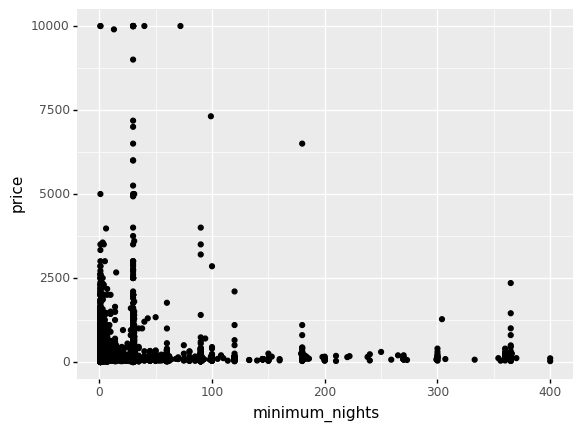

<ggplot: (306393944)>

In [5]:
(
    ggplot(df, aes(x='minimum_nights', y='price')) + xlim(0,400) + geom_point()
)

/Users/misha/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 25 rows containing missing values.


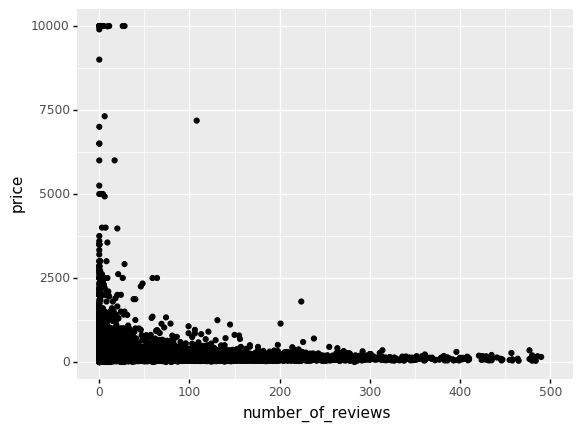

<ggplot: (307291118)>

In [6]:
(
    ggplot(df, aes(x='number_of_reviews', y='price')) + geom_point() + xlim(0,500)
)

### Regressions and Models (exploratory)

This is where you start using some of the more advanced statsitical techniques you've learned so far to understand the data better. Wondering if the differences between two means is significant? You want to try a t-test. Alternatively, this is a good place to play around with regressions to better understand how variables in your dataset relate to one another. You might want to put the takeaway from the regression model in the cell below, just so you don't forget what exploration you did and what it means.

In [7]:
import statsmodels.formula.api as smf
model = smf.ols("price ~ minimum_nights + number_of_reviews", data=df)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     30.01
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           9.50e-14
Time:                        08:36:39   Log-Likelihood:            -2.7098e+05
No. Observations:               38185   AIC:                         5.420e+05
Df Residuals:                   38182   BIC:                         5.420e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           168.0825      2.046     82.158      0.000     164.073     172.092
minimum_nights       -0.1673      0.052     -3.210      0.001      -0.269      -0.065
number_of_reviews    -0.2208      0.030     -7.454      0.000      -0.279      -0.163
==============================================================================
Omnibus:                    83919.578   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        562146157.483
Skew:                          20.200   Prob(JB):                         0.00
Kurtosis:                     596.032   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Thoughts 👉 

In the cells below, freewrite your thoughts, takeaways, burning questions, etc...

I reccomend bullet point format...but some people think in paragraphs and that's fine too! This is to help you synthesize the exporation you've just done and think through where you might go next.

Are there questions you have that will require reporting to answer? Questions that will require expert statistical help? Are there variables your data doesn't consider or additional data that you need to join to this data? Is there a budding seed of a pitch somewhere?

Also think about the **limitations of the data** and the **implications of your methodological choices** so far.

* I know that the R-squared is really low BUT if I had more time I would separate the dataset by price categories and then run the regression again. Because it does seem like there is a correlation for prices under $175
*


# Next Steps 👉 

What do you think the next steps are to get this from exploratory data analysis to pitch? Be honest. If you think there's nothing here, just say that and try to figure out what a more meaningful approach or journalistic question would be. If you do think this could lead to your pitch, think through where you might go next with it:

- Do you need more data? If so, where might you get it?
- Do you need to do reporting? If so, who do you need to talk to?
- Do you, at this point, need the help of someone with more stats knowledge? If so, what questions would you ask them?



I noticed that other models designed for the Airbnb dataset by data experts did not have an R-Squared greater than around 0.55, so I'm not sure if there is a story. But I do want to talk to someone who understands Airbnb trends in New York because that will allow us to run more focussed regressions. 